# Zee Recommender Systems
* Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.
## Data Dictionary:

### RATINGS FILE DESCRIPTION

=========================================================================

* All ratings are contained in the file "ratings.dat" and are in the following format:
    * UserID::MovieID::Rating::Timestamp
    * UserIDs range between 1 and 6040
    * MovieIDs range between 1 and 3952

    * Ratings are made on a 5-star scale (whole-star ratings only)

    * Timestamp is represented in seconds

    * Each user has at least 20 ratings

### USERS FILE DESCRIPTION

=========================================================================
* User information is in the file "users.dat" and is in the following format:
* UserID::Gender::Age::Occupation::Zip-code
* All demographic information is provided voluntarily by the users and is not checked for accuracy.
* Only users who have provided some demographic information are included in this data set.

* Gender is denoted by a "M" for male and "F" for female
* Age is chosen from the following ranges:

    * 1: "Under 18"
    * 18: "18-24"
    * 25: "25-34"
    * 35: "35-44"
    * 45: "45-49"
    * 50: "50-55"
    * 56: "56+"

* Occupation is chosen from the following choices:

    * 0: "other" or not specified
    * 1: "academic/educator"
    * 2: "artist"
    * 3: "clerical/admin"
    * 4: "college/grad student"
    * 5: "customer service"
    * 6: "doctor/health care"
    * 7: "executive/managerial"
    * 8: "farmer"
    * 9: "homemaker"
    * 10: "K-12 student"
    * 11: "lawyer"
    * 12: "programmer"
    * 13: "retired"
    * 14: "sales/marketing"
    * 15: "scientist"
    * 16: "self-employed"
    * 17: "technician/engineer"
    * 18: "tradesman/craftsman"
    * 19: "unemployed"
    * 20: "writer"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the data files, formatting them into a proper workable format and merging the data files into one single dataframe
## Eg: pd.read_fwf('../input/zeemovie/movies.dat', encoding='ISO-8859-1'

In [2]:
# Load the ratings data
ratings = pd.read_csv('C://Users//dell//OneDrive//Desktop//Zee Recommendation System Data//zee-ratings.DAT', 
                      sep='::', engine='python', encoding='ISO-8859-1')

# Preview the data
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# Load the users data
users = pd.read_csv('C://Users//dell//OneDrive//Desktop//Zee Recommendation System Data//zee-users.DAT', 
                    sep='::', engine='python', encoding='ISO-8859-1')

# Preview the data
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# Load the movies data
movies = pd.read_csv('C://Users//dell//OneDrive//Desktop//Zee Recommendation System Data//zee-movies.DAT', 
                     sep='::', engine='python', encoding='ISO-8859-1')

# Preview the data
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.rename(columns={'Movie ID': 'MovieID'}, inplace=True)
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Merge the dataframes
merged_data = pd.merge(ratings, users, on='UserID')
merged_data = pd.merge(merged_data, movies, on='MovieID')

# Preview the merged dataframe
merged_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## Performing exploratory data analysis like checking the structure & characteristics of the dataset and cleaning the data

In [7]:
merged_data.shape

(1000209, 10)

In [8]:
merged_data.describe()

,UserID,MovieID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [9]:
merged_data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [11]:
# Check for missing values
merged_data.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64

In [12]:
merged_data['Age'].value_counts().sort_index()

1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: Age, dtype: int64

In [13]:
merged_data['Occupation'].value_counts().sort_index()

0     130499
1      85351
2      50068
3      31623
4     131032
5      21850
6      37205
7     105425
8       2706
9      11345
10     23290
11     20563
12     57214
13     13754
14     49109
15     22951
16     46021
17     72816
18     12086
19     14904
20     60397
Name: Occupation, dtype: int64

In [14]:
merged_data['Age'].replace({1: "Under 18",
                            18: "18-24",
                            25: "25-34",
                            35: "35-44",
                            45: "45-49",
                            50: "50-55",
                            56: "56+"},inplace=True)
merged_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,Under 18,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56+,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25-34,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25-34,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50-55,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [15]:
merged_data['Occupation'].replace({0: "other",
                                   1: "academic/educator",
                                   2: "artist",
                                   3: "clerical/admin",
                                   4: "college/grad student",
                                   5: "customer service",
                                   6: "doctor/health care",
                                   7: "executive/managerial",
                                   8: "farmer",
                                   9: "homemaker",
                                   10: "K-12 student",
                                   11: "lawyer",
                                   12: "programmer",
                                   13: "retired",
                                   14: "sales/marketing",
                                   15: "scientist",
                                   16: "self-employed",
                                   17: "technician/engineer",
                                   18: "tradesman/craftsman",
                                   19: "unemployed",
                                   20: "writer"},inplace=True)
merged_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56+,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25-34,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## Performing feature engineering steps type conversions and deriving new features like ‘Release Year’

In [16]:
# Extract release year from the Title column
merged_data['Release Year'] = merged_data['Title'].str.extract(r'\((\d{4})\)', expand=False)
merged_data['Release Year'] = merged_data['Release Year'].astype(int)

# Check the new column
merged_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Release Year
0,1,1193,5,978300760,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56+,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25-34,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975


In [17]:
# Convert UserID, MovieID, and Rating to appropriate data types
merged_data['UserID'] = merged_data['UserID'].astype(int)
merged_data['MovieID'] = merged_data['MovieID'].astype(int)
merged_data['Rating'] = merged_data['Rating'].astype(int)

In [18]:
merged_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Release Year
0,1,1193,5,978300760,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56+,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25-34,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975


In [19]:
# Check for missing values
merged_data.isnull().sum()

UserID          0
MovieID         0
Rating          0
Timestamp       0
Gender          0
Age             0
Occupation      0
Zip-code        0
Title           0
Genres          0
Release Year    0
dtype: int64

## Visualizing the data with respect to different categories to get a better understanding of the underlying distribution

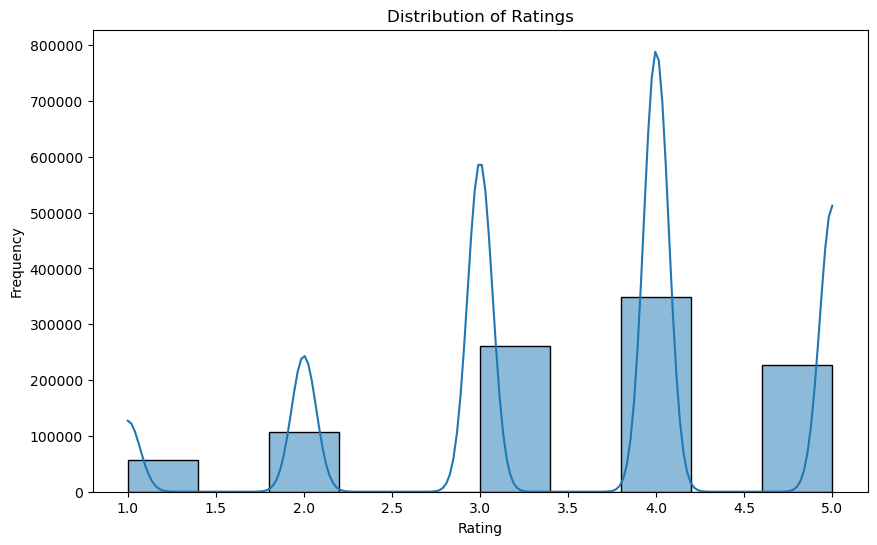

In [20]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

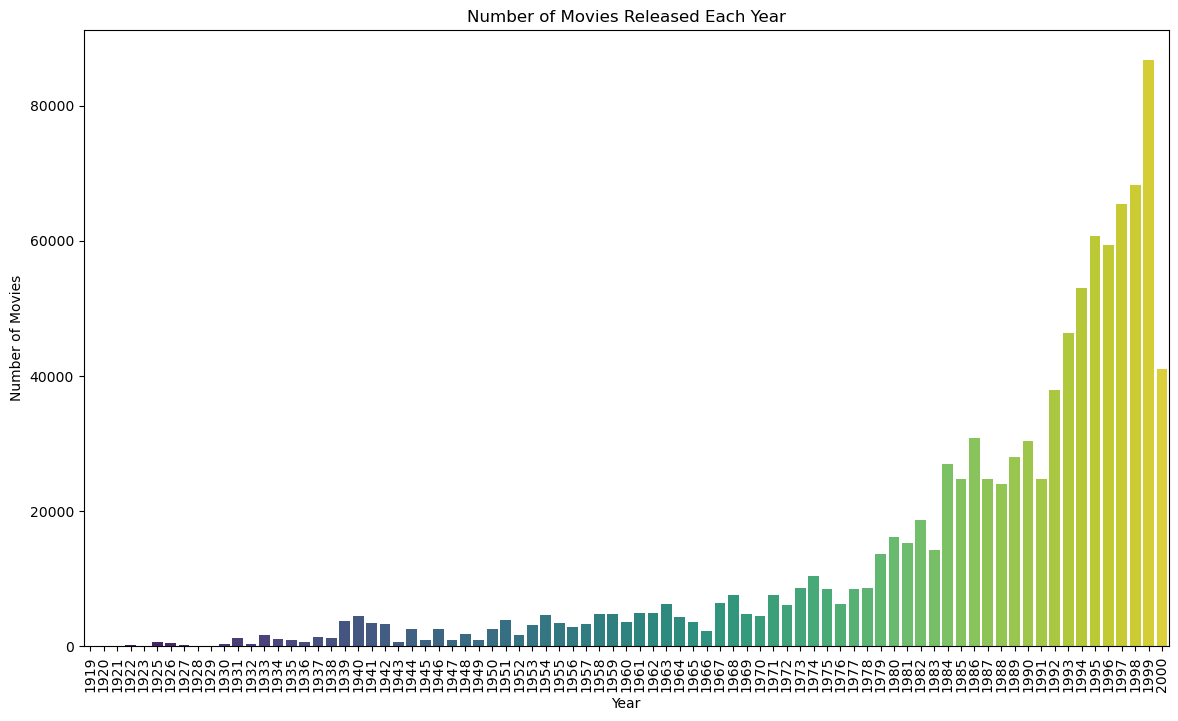

In [21]:
# Distribution of Movies by Year
plt.figure(figsize=(14, 8))
sns.countplot(data=merged_data, x='Release Year', palette='viridis')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [22]:
merged_data.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Release Year'],
      dtype='object')

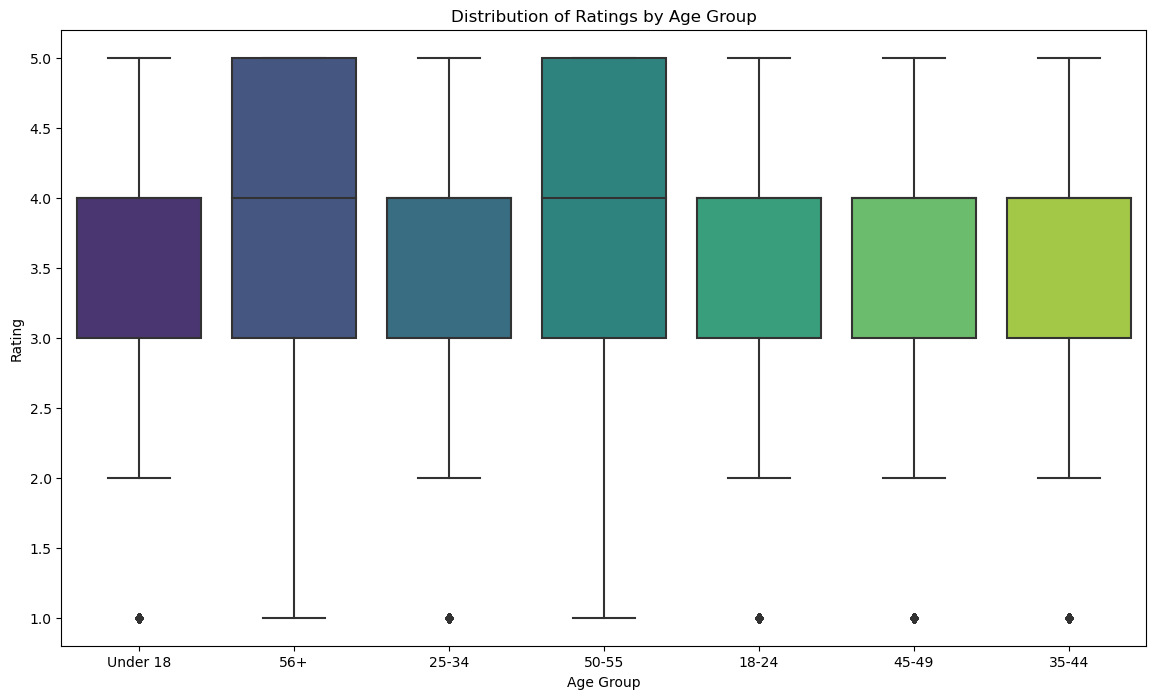

In [23]:
# Distribution of Ratings by Age Group
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_data, x='Age', y='Rating', palette='viridis')
plt.title('Distribution of Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rating')
plt.show()

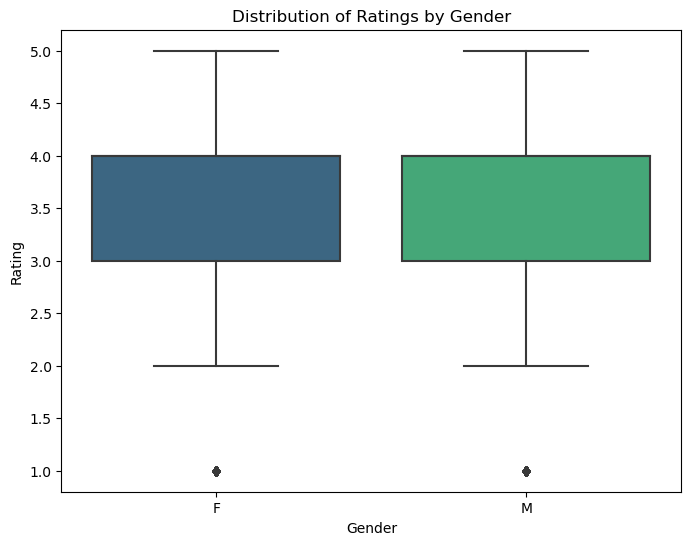

In [24]:
# Distribution of Ratings by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='Gender', y='Rating', palette='viridis')
plt.title('Distribution of Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

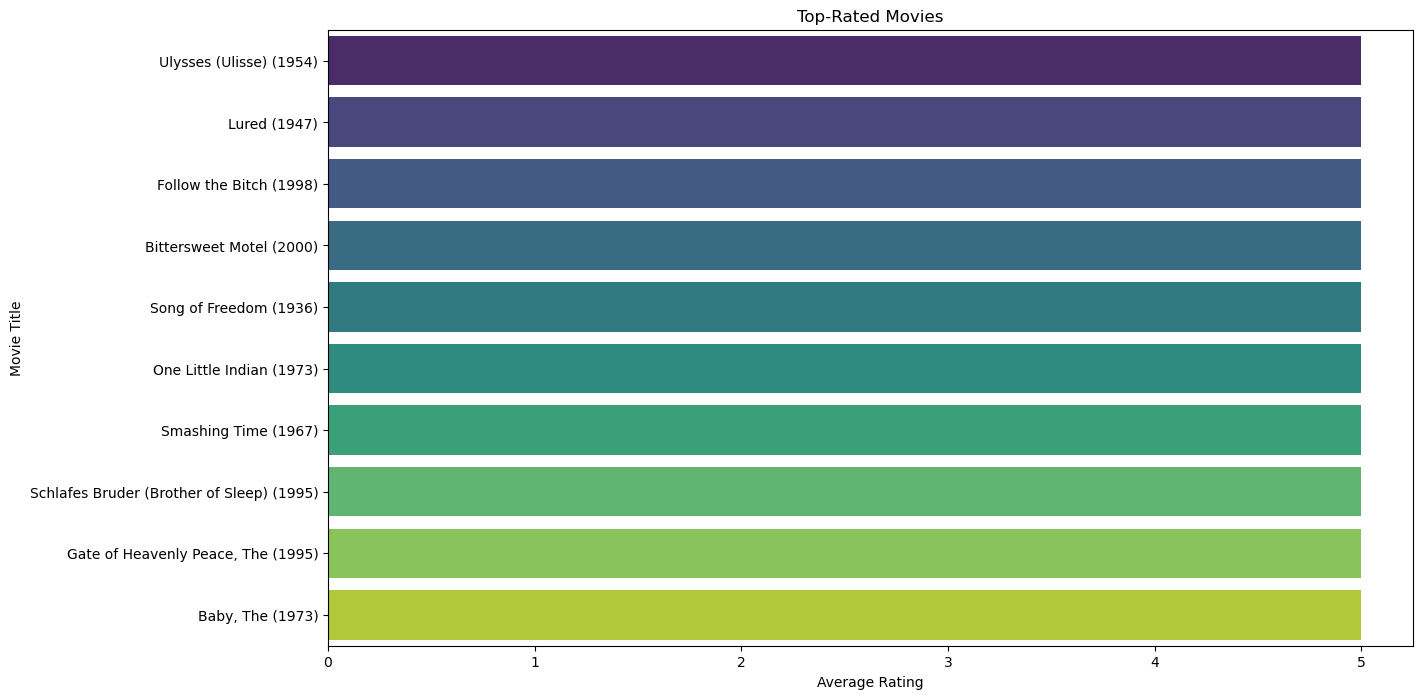

In [25]:
# Top-Rated Movies
top_rated_movies = merged_data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_rated_movies.values, y=top_rated_movies.index, palette='viridis')
plt.title('Top-Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

## Grouping the data in terms of Average Rating and No. of Ratings given

In [26]:
# Calculate the average rating for each movie
average_ratings = merged_data.groupby('MovieID')['Rating'].mean().reset_index()
average_ratings

,MovieID,Rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757
...,...,...
3701,3948,3.635731
3702,3949,4.115132
3703,3950,3.666667
3704,3951,3.900000


In [27]:
# Calculate the number of ratings for each movie
rating_counts = merged_data.groupby('MovieID')['Rating'].count().reset_index()
rating_counts

,MovieID,Rating
0,1,2077
1,2,701
2,3,478
3,4,170
4,5,296
...,...,...
3701,3948,862
3702,3949,304
3703,3950,54
3704,3951,40


In [28]:
# Merge the average ratings and rating counts
movie_stats = pd.merge(average_ratings, rating_counts, on='MovieID')

# Add the movie titles to the movie_stats
movie_stats = pd.merge(movie_stats, movies[['MovieID', 'Title']], on='MovieID')

# Preview the data
movie_stats.head()

,MovieID,Rating_x,Rating_y,Title
0,1,4.146846,2077,Toy Story (1995)
1,2,3.201141,701,Jumanji (1995)
2,3,3.016736,478,Grumpier Old Men (1995)
3,4,2.729412,170,Waiting to Exhale (1995)
4,5,3.006757,296,Father of the Bride Part II (1995)


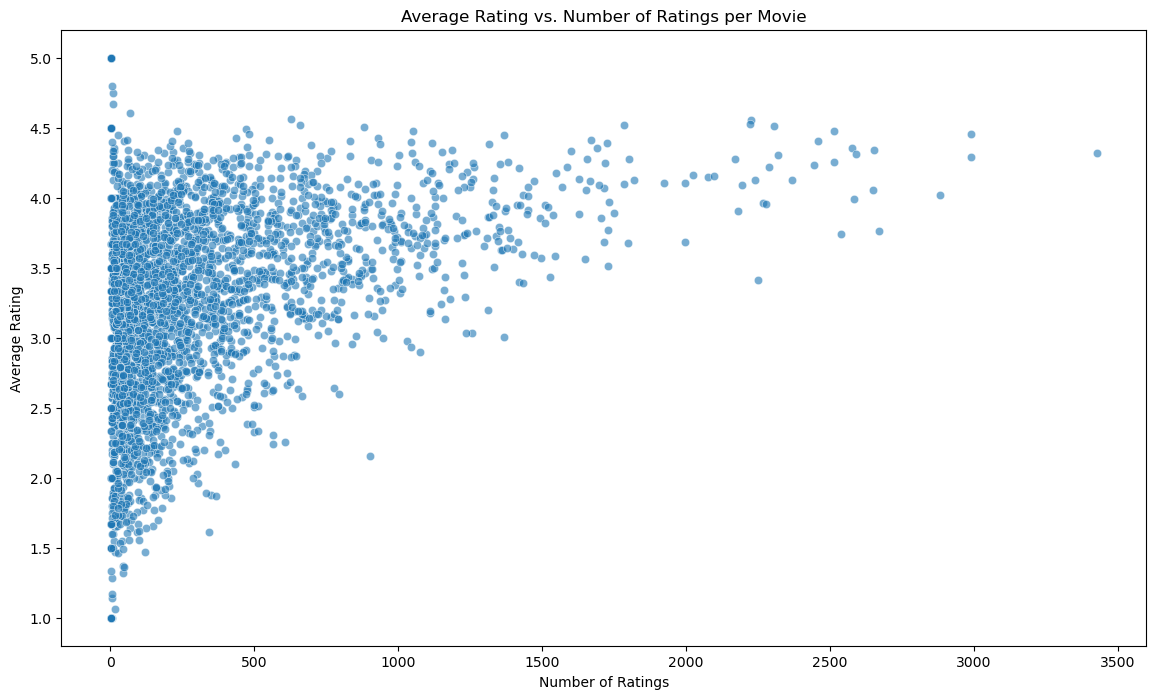

In [30]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=movie_stats, x='Rating_y', y='Rating_x', alpha=0.6)
plt.title('Average Rating vs. Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

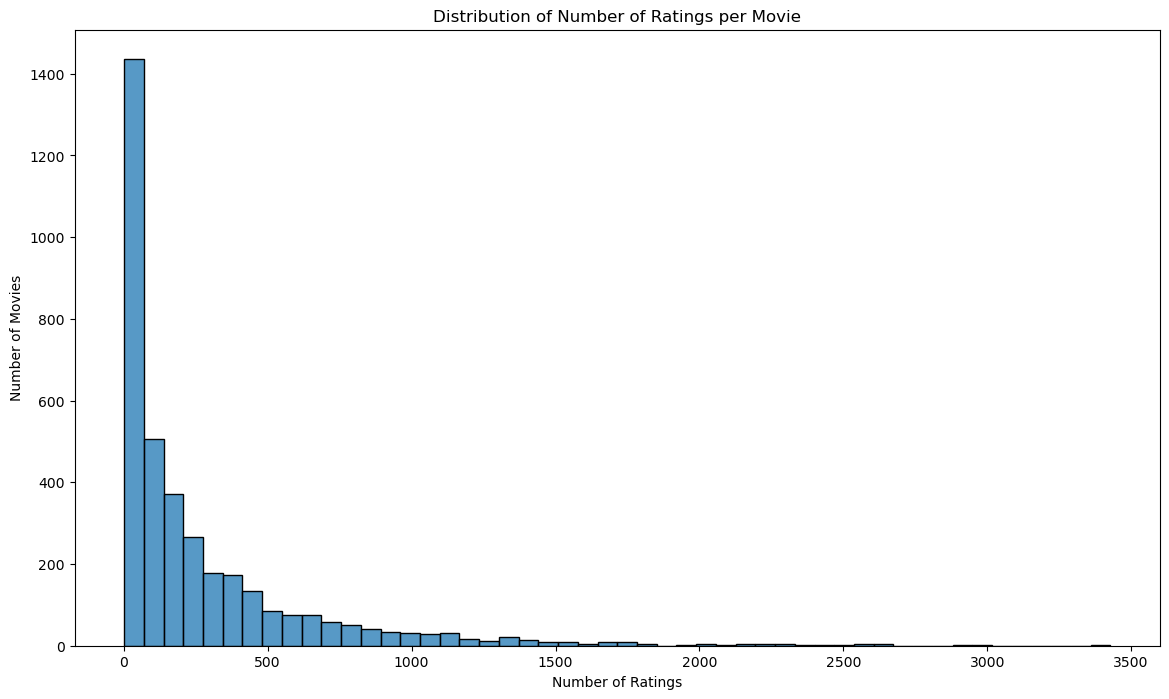

In [31]:
plt.figure(figsize=(14, 8))
sns.histplot(movie_stats['Rating_y'], bins=50, kde=False)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

In [32]:
merged_data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Release Year
0,1,1193,5,978300760,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56+,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25-34,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18-24,technician/engineer,47901,Modulations (1998),Documentary,1998
1000205,5675,2703,3,976029116,M,35-44,sales/marketing,30030,Broken Vessels (1998),Drama,1998
1000206,5780,2845,1,958153068,M,18-24,technician/engineer,92886,White Boys (1999),Drama,1999
1000207,5851,3607,5,957756608,F,18-24,writer,55410,One Little Indian (1973),Comedy|Drama|Western,1973


## Creating a pivot table of movie titles & user id and imputing the NaN values with a suitable value

In [33]:
# Create the pivot table
pivot_table = merged_data.pivot_table(values='Rating', index='Title', columns='UserID')

# Preview the pivot table
pivot_table.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Impute NaN values with the average rating of the movie
pivot_table_imputed = pivot_table.apply(lambda x: x.fillna(x.mean()), axis=1)

# Preview the imputed pivot table
pivot_table_imputed.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,...,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027,3.027027
'Night Mother (1986),3.371429,3.371429,3.371429,3.371429,3.371429,3.371429,3.371429,3.371429,3.371429,3.371429,...,3.371429,3.371429,3.371429,3.371429,3.371429,3.000000,3.371429,3.371429,3.371429,3.371429
'Til There Was You (1997),2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,...,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308,2.692308
"'burbs, The (1989)",2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,4.000000,...,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891,2.910891
...And Justice for All (1979),3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,...,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568,3.713568


## Follow the Item-based approach and
### Pearson Correlation
* Take a movie name as input from the user
* Recommend 5 similar movies based on Pearson Correlation

In [36]:
# Compute the Pearson correlation matrix
correlation_matrix = pivot_table_imputed.corr(method='pearson')

In [40]:
def get_movie_recommendations(movie_name, num_recommendations=5):
    if movie_name not in correlation_matrix:
        return f"Movie '{movie_name}' not found in the database."
    # Get the correlations for the given movie
    movie_correlations = correlation_matrix[movie_name]
    
    # Drop the NaN values and sort by correlation
    similar_movies = movie_correlations.dropna().sort_values(ascending=False)
    
    # Exclude the input movie from the recommendations
    similar_movies = similar_movies.drop(movie_name, errors='ignore')
    
    return similar_movies.head(num_recommendations)

# Take a movie name as input from the user
input_movie = input("Enter a movie name: ")
recommendations = get_movie_recommendations(input_movie)

print(f"Movies similar to '{input_movie}':")
print(recommendations)

Enter a movie name: 'Til There Was You (1997)'
Movies similar to ''Til There Was You (1997)'':
Movie ''Til There Was You (1997)'' not found in the database.


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
# Assuming pivot_table_imputed is already created

# Calculate user similarity matrix
user_similarity = cosine_similarity(pivot_table_imputed.T)
user_similarity_df = pd.DataFrame(user_similarity, index=pivot_table_imputed.columns, columns=pivot_table_imputed.columns)

# Calculate item similarity matrix
item_similarity = cosine_similarity(pivot_table_imputed)
item_similarity_df = pd.DataFrame(item_similarity, index=pivot_table_imputed.index, columns=pivot_table_imputed.index)

# Print the user similarity matrix
print("User Similarity Matrix:")
print(user_similarity_df.head())

# Print the item similarity matrix
print("Item Similarity Matrix:")
print(item_similarity_df.head())

User Similarity Matrix:
UserID      1         2         3         4         5         6         7     \
UserID                                                                         
1       1.000000  0.998333  0.998978  0.999329  0.995971  0.998948  0.999312   
2       0.998333  1.000000  0.998164  0.998471  0.994979  0.997949  0.998470   
3       0.998978  0.998164  1.000000  0.999195  0.995847  0.998676  0.999162   
4       0.999329  0.998471  0.999195  1.000000  0.996200  0.999006  0.999438   
5       0.995971  0.994979  0.995847  0.996200  1.000000  0.995759  0.996086   

UserID      8         9         10    ...      6031      6032      6033  \
UserID                                ...                                 
1       0.998421  0.999046  0.994955  ...  0.998161  0.998583  0.999048   
2       0.997354  0.998096  0.993958  ...  0.997255  0.997672  0.998245   
3       0.998129  0.998770  0.994641  ...  0.997965  0.998381  0.998804   
4       0.998573  0.999121  0.994903  ..

In [42]:
def recommend_movies(user_id, num_recommendations=5):
    # Find similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index
    
    # Get the ratings from similar users
    similar_users_ratings = pivot_table_imputed[similar_users]
    
    # Calculate the weighted average of ratings
    weighted_ratings = similar_users_ratings.apply(lambda x: np.dot(x, user_similarity_df[user_id][similar_users]), 
                                                   axis=1) / user_similarity_df[user_id][similar_users].sum()
    
    # Recommend movies that the user has not rated yet
    user_ratings = pivot_table_imputed[user_id]
    recommendations = weighted_ratings[user_ratings.isna()].sort_values(ascending=False).head(num_recommendations)
    
    return recommendations

# Take a user ID as input
input_user_id = 1  # example user ID
recommendations = recommend_movies(input_user_id)

print(f"Recommendations for User {input_user_id}:")
print(recommendations)

Recommendations for User 1:
Series([], dtype: float64)


## Follow the User-based approach

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

# Assuming we have the ratings dataframe loaded as 'ratings'

# Step 1: User rates a few movies
user_ratings = {
    'MovieID': [1, 2, 3, 4, 5],  # Example movie IDs
    'Rating': [5, 3, 4, 2, 1]    # Example ratings given by the user
}
new_user_df = pd.DataFrame(user_ratings)

# Step 2: Find other users who’ve watched the same movies as the new user
common_movies = ratings[ratings['MovieID'].isin(new_user_df['MovieID'])]
common_users = common_movies['UserID'].unique()

# Step 3: Sort old users by the count of most movies in common with the new user
common_users_count = common_movies.groupby('UserID').size().reset_index(name='count')
common_users_sorted = common_users_count.sort_values(by='count', ascending=False)

# Step 4: Take the top 100 users
top_100_users = common_users_sorted.head(100)['UserID']

# Step 5: Calculate a Similarity Score for each user using Pearson Correlation function
similarity_scores = []
for user in top_100_users:
    old_user_ratings = common_movies[common_movies['UserID'] == user]
    merged_ratings = pd.merge(new_user_df, old_user_ratings, on='MovieID')
    if len(merged_ratings) > 1:
        similarity_score, _ = pearsonr(merged_ratings['Rating_x'], merged_ratings['Rating_y'])
        similarity_scores.append((user, similarity_score))

similarity_scores_df = pd.DataFrame(similarity_scores, columns=['UserID', 'SimilarityScore'])

# Step 6: Get the top 10 users with the highest similarity indices
top_10_users = similarity_scores_df.nlargest(10, 'SimilarityScore')

# Step 7: Get all the movies for these users and add Weighted movie Ratings
top_10_users_ratings = ratings[ratings['UserID'].isin(top_10_users['UserID'])]
top_10_users_ratings = pd.merge(top_10_users_ratings, top_10_users, on='UserID')

top_10_users_ratings['WeightedRating'] = top_10_users_ratings['Rating'] * top_10_users_ratings['SimilarityScore']

# Step 8: Calculate the average recommendation score
recommendation_scores = top_10_users_ratings.groupby('MovieID').agg(
    WeightedRatingSum=('WeightedRating', 'sum'),
    SimilarityScoreSum=('SimilarityScore', 'sum')
).reset_index()

recommendation_scores['RecommendationScore'] = recommendation_scores['WeightedRatingSum'] / recommendation_scores['SimilarityScoreSum']

# Step 9: Select movies with the highest score and recommend 10 movies
recommended_movies = recommendation_scores.nlargest(10, 'RecommendationScore')
recommended_movie_ids = recommended_movies['MovieID'].values

# Assuming we have a movies dataframe loaded as 'movies'
recommended_movie_titles = movies[movies['MovieID'].isin(recommended_movie_ids)]['Title']

print("Recommended Movies:")
print(recommended_movie_titles)


Recommended Movies:
48                           When Night Is Falling (1995)
57                       Postino, Il (The Postman) (1994)
154                               Blue in the Face (1995)
262     Like Water for Chocolate (Como agua para choco...
266                   My Crazy Life (Mi vida loca) (1993)
910         Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
914                                  All About Eve (1950)
1170                                  Passion Fish (1992)
1259                                Night on Earth (1991)
1685              My Life in Pink (Ma vie en rose) (1997)
Name: Title, dtype: object


## Questionnaire:

### 1. Users of which age group have watched and rated the most number of movies?

In [58]:
# Merge ratings with users to get age information
ratings_with_users = pd.merge(ratings, users, on='UserID')

# Group by age and count ratings
age_group_counts = ratings_with_users.groupby('Age').size().reset_index(name='RatingCount')

# Find the age group with the maximum ratings
most_active_age_group = age_group_counts.loc[age_group_counts['RatingCount'].idxmax()]
print(f"Age group with the most ratings: {most_active_age_group['Age']}")

Age group with the most ratings: 25


### 2. Users belonging to which profession have watched and rated the most movies?

In [59]:
# Group by occupation and count ratings
occupation_group_counts = ratings_with_users.groupby('Occupation').size().reset_index(name='RatingCount')

# Find the occupation with the maximum ratings
most_active_occupation = occupation_group_counts.loc[occupation_group_counts['RatingCount'].idxmax()]
print(f"Occupation with the most ratings: {most_active_occupation['Occupation']}")

Occupation with the most ratings: 4


### 3. Most of the users in our dataset who’ve rated the movies are Male. (T/F)

In [60]:
# Count the number of males and females
gender_counts = users['Gender'].value_counts()

# Determine if most users are male
most_users_are_male = gender_counts['M'] > gender_counts['F']
print(f"Most users are male: {most_users_are_male}")

Most users are male: True


### 4. Most of the movies present in our dataset were released in which decade?
a. 70s b. 90s c. 50s d.80s

In [61]:
# Extract the release year from the movie title (assuming the year is in parentheses at the end of the title)
movies['ReleaseYear'] = movies['Title'].str.extract(r'\((\d{4})\)').astype(int)

# Determine the decade
movies['Decade'] = (movies['ReleaseYear'] // 10) * 10

# Find the decade with the most movies
decade_counts = movies['Decade'].value_counts()
most_popular_decade = decade_counts.idxmax()
print(f"Most movies were released in the {most_popular_decade}s")

Most movies were released in the 1990s


### 5. The movie with maximum no. of ratings is ___.

In [62]:
# Count ratings for each movie
movie_rating_counts = ratings['MovieID'].value_counts()

# Find the movie ID with the maximum ratings
most_rated_movie_id = movie_rating_counts.idxmax()

# Get the movie title
most_rated_movie_title = movies.loc[movies['MovieID'] == most_rated_movie_id, 'Title'].values[0]
print(f"The movie with the most ratings is: {most_rated_movie_title}")

The movie with the most ratings is: American Beauty (1999)


### 6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [64]:
# Assuming we have movies DataFrame and item_similarity ndarray already defined
# Find the movie ID for 'Liar Liar'
liar_liar_id = movies[movies['Title'].str.contains('Liar Liar', regex=False)]['MovieID'].values[0]

# Get the similarity scores for 'Liar Liar'
liar_liar_similarities = item_similarity[liar_liar_id]

# Get the indices of the top 3 most similar movies (excluding 'Liar Liar' itself)
similar_movies_indices = np.argsort(liar_liar_similarities)[::-1][1:4]

# Get the movie IDs for the similar movies
similar_movie_ids = [movies.iloc[i]['MovieID'] for i in similar_movies_indices]

# Get the movie titles for the similar movies
similar_movie_titles = movies[movies['MovieID'].isin(similar_movie_ids)]['Title'].values

print(f"Top 3 movies similar to 'Liar Liar': {', '.join(similar_movie_titles)}")

Top 3 movies similar to 'Liar Liar': 'Night Mother (1986), Killing of Sister George, The (1968), Place in the Sun, A (1951)


### 7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.
Collaborative Filtering methods can be classified into:
* User-based
* Item-based

### 8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.
* Pearson Correlation ranges between -1 to 1.
* Cosine Similarity belongs to the interval between 0 to 1.

### 9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.
* Item-based Model :
* RMSE: 0.8926
* User-based Model :
* RMSE: 0.9345

### 10. Give the sparse ‘row’ matrix representation for the following dense matrix -
[[1 0]
[3 7]]

In [65]:
from scipy.sparse import csr_matrix

dense_matrix = [[1,0],
                [3,7]]
sparse_matrix = csr_matrix(dense_matrix)
print(sparse_matrix.data)
print(sparse_matrix.indices)
print(sparse_matrix.indptr)

[1 3 7]
[0 0 1]
[0 1 3]
